# Loading DB

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [3]:
X, y = digits.data, digits.target

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
X.shape

(1797, 64)

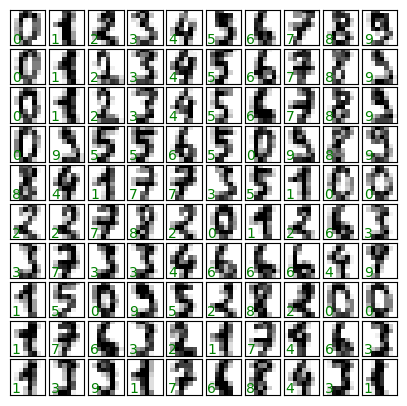

In [7]:
fig, axes = plt.subplots(10, 10, figsize=(5, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.7, random_state=41)

# Import data
 

In [9]:
import json
file_path = 'data.json'

with open(file_path, 'r') as f:
    data = json.load(f)

X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

X_train = np.array(data['X_train'])
y_train = np.array(data['y_train'])
X_test = np.array(data['X_test'])
y_test = np.array(data['y_test'])


print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1257, 64)
Shape of y_train: (1257,)
Shape of X_test: (540, 64)
Shape of y_test: (540,)


# Feature Selection

In [10]:
from sklearn.feature_selection import VarianceThreshold

## P = 0.8

# Define list of numbers of components for Variance threshold


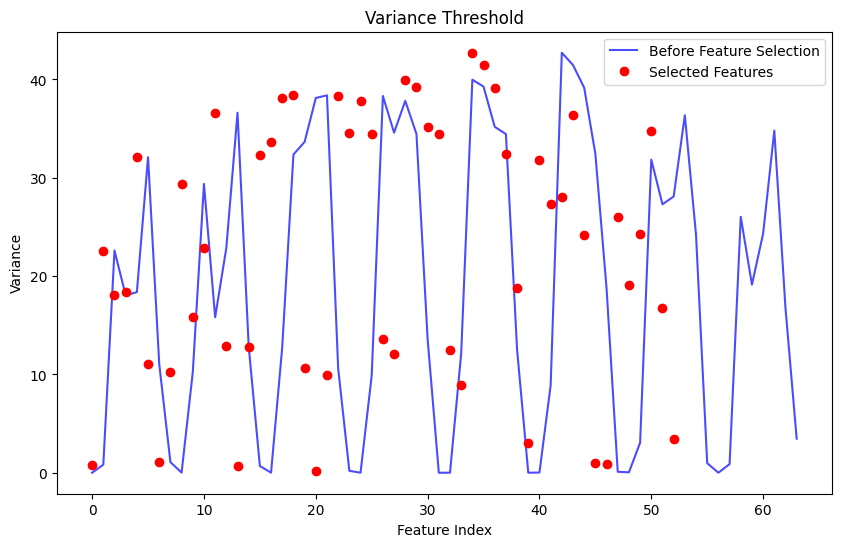

Number of selected features (VarianceThreshold): 53


In [11]:
# Calculate variances of features before feature selection
variances_before = np.var(X, axis=0)

# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_fs = sel.fit_transform(X)

# Calculate variances of features after feature selection
variances_after = np.var(X_fs, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

# Feature extraction


In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
import random

num_components_list = [2, 5, 10, 15, 20, 30]
best_accuracy = 0
worst_accuracy = 100
best_parameters = {}
worst_parameters = {}
kernels = ['linear', 'poly', 'rbf','sigmoid']
gammas = ['scale']
C_values = [0.1,1]
degrees = [2,3,4]
best_results = []
worst_results = []
accuracies = []


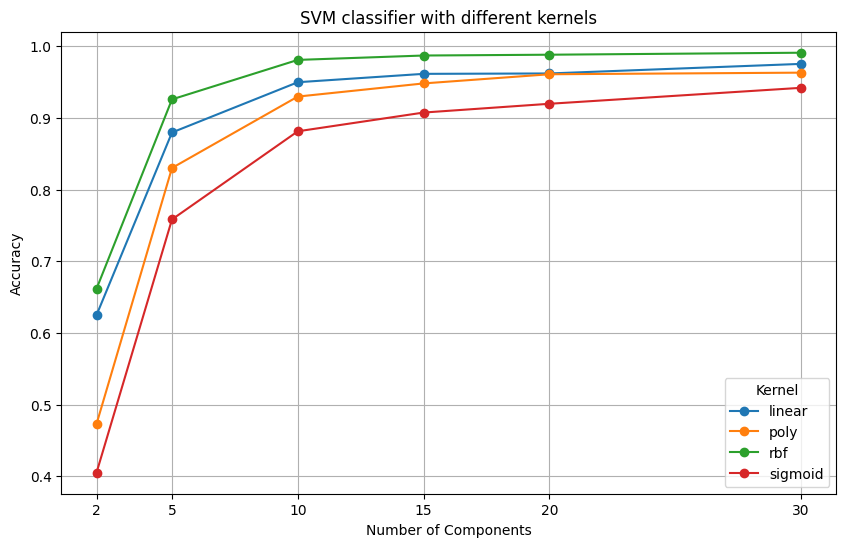

****** Best results ******
Kernel:linear, Accuracy:0.976, Gamma:scale, C:1, Degree:4, Components:30 
Kernel:poly, Accuracy:0.991, Gamma:scale, C:1, Degree:3, Components:20 
Kernel:rbf, Accuracy:0.991, Gamma:scale, C:1, Degree:2, Components:30 
Kernel:sigmoid, Accuracy:0.942, Gamma:scale, C:1, Degree:3, Components:30 

****** Worst results ******
Kernel:linear, Accuracy:0.625, Gamma:scale, C:1, Degree:2, Components:2 
Kernel:poly, Accuracy:0.437, Gamma:scale, C:0.1, Degree:4, Components:2 
Kernel:rbf, Accuracy:0.657, Gamma:scale, C:0.1, Degree:3, Components:2 
Kernel:sigmoid, Accuracy:0.405, Gamma:scale, C:1, Degree:3, Components:2 


In [13]:
# Initialize figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Iterate over each kernel, gamma, C value, and degree
for kernel in kernels:
    best_accuracy = 0
    worst_accuracy = 100
    for gamma in gammas:
        for C in C_values:
            for degree in degrees:
                accuracies = []
                # Train and evaluate models with different numbers of components for PCA
                for num_components in num_components_list:
                    # Feature extraction using PCA
                    pca = PCA(n_components=num_components)
                    X_fe = pca.fit_transform(X_fs)

                    # Initialize Support Vector Machine classifier with specified parameters
                    clf = SVC(kernel=kernel, gamma=gamma, C=C, degree=degree)

                    # Perform 10-fold cross-validation
                    kf = KFold(n_splits=10, shuffle=True, random_state=42)
                    scores = cross_val_score(clf, X_fe, y, cv=kf)
                    accuracy = scores.mean()
                    accuracies.append(accuracy)

                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_parameters = {
                            "kernel":kernel,
                            "accuracy":accuracy,
                            "gamma":gamma,
                            "c":C,
                            "degree":degree,
                            "components":num_components
                        }
                    elif accuracy < worst_accuracy:
                        worst_accuracy = accuracy
                        worst_parameters = {
                            "kernel": kernel,
                            "accuracy": accuracy,
                            "gamma": gamma,
                            "c": C,
                            "degree":degree,
                            "components":num_components
                        }

    best_results.append(best_parameters)
    worst_results.append(worst_parameters)
    label = f"{kernel}"
    ax.plot(num_components_list, accuracies, marker='o', linestyle='-', label=label)

# Add labels and legend to the plot
plt.title('SVM classifier with different kernels')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.xticks(num_components_list)
plt.grid(True)
plt.legend(title='Kernel')
plt.show()

# Print the best and worst results for each kernel
print("****** Best results ******")
for result in best_results:
    print(f"Kernel:{result['kernel']}, Accuracy:{result['accuracy']:.3f}, Gamma:{result['gamma']}, C:{result['c']},"
          f" Degree:{result['degree']}, Components:{result['components']} ")

print("\n****** Worst results ******")
for result in worst_results:
    print(f"Kernel:{result['kernel']}, Accuracy:{result['accuracy']:.3f}, Gamma:{result['gamma']}, C:{result['c']},"
          f" Degree:{result['degree']}, Components:{result['components']} ")
